In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import requests
import os

In [8]:
# Create data folder
os.makedirs("../data", exist_ok=True)

# Correct ZIP download URL (Natural Earth - Admin 0 – Countries)
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
zip_path = "../data/countries.zip"

# Download the ZIP file
response = requests.get(url)

# Check response
if response.status_code != 200:
    raise Exception(f"Failed to download. Status code: {response.status_code}")

# Write the content to a file
with open(zip_path, "wb") as f:
    f.write(response.content)

In [9]:
# Unzip
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("../data/countries")

# Read shapefile
world = gpd.read_file("../data/countries/ne_110m_admin_0_countries.shp")
world.head()  # Display the first few rows of the GeoDataFrame


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [10]:
for i in world.columns:
    print(i)  # Print the names of the columns

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

In [11]:
world.shape

(177, 169)

In [12]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [13]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

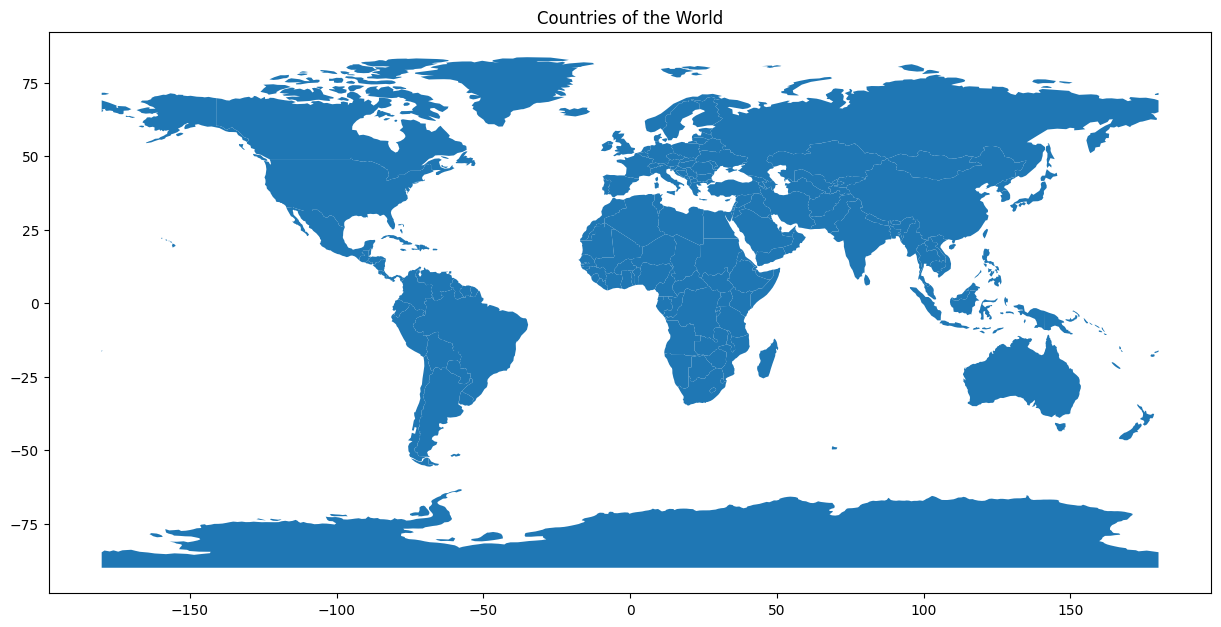

In [14]:
# Plot the world map
world.plot(figsize = (15, 15))
plt.title("Countries of the World")
plt.show()

# NOTE: plot uses the collumn 'geometry' by default

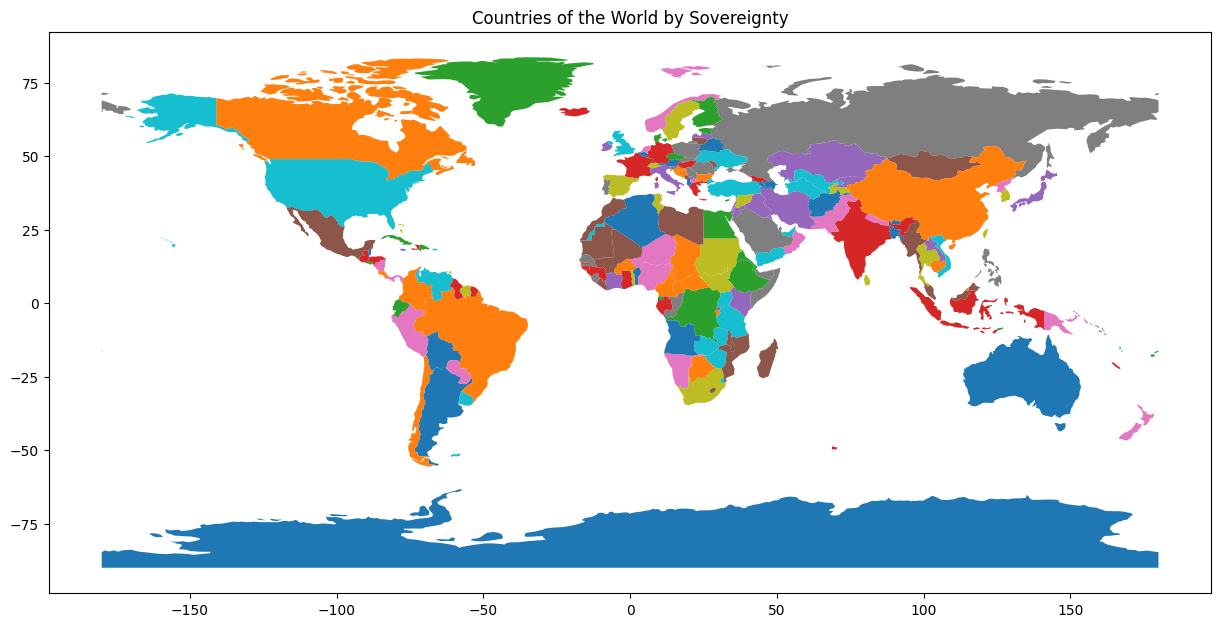

In [15]:
world.plot(column='SOVEREIGNT', figsize=(15, 15))
plt.title("Countries of the World by Sovereignty")
plt.show()

 🧪 Hands-On: Filter Data by Attribute

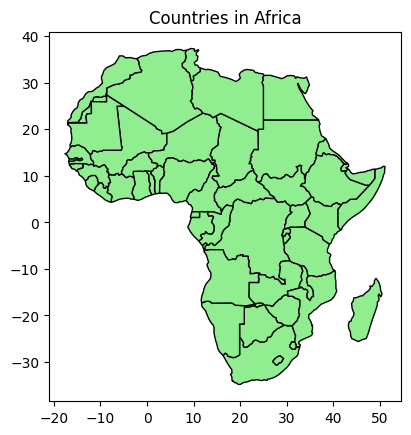

In [16]:
africa = world[world['CONTINENT'] == 'Africa']
# Plot
africa.plot(color='lightgreen', edgecolor='black')
plt.title("Countries in Africa")
plt.show()

📏 Spatial Operations: Centroids and Buffers

In [17]:
africa["centroid"] = africa.geometry.centroid

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_57445/4272771528.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa["centroid"] = africa.geometry.centroid
/Users/dquispe/Documents/repositories/intro_geospatial_data/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
africa.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",POINT (34.75299 -6.25773)
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)
11,Admin-0 country,1,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,1,Democratic Republic of the Congo,...,None,None,None,None,None,None,None,None,"POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2...",POINT (23.58296 -2.85028)
12,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,1,Somalia,...,None,None,None,None,None,None,None,None,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ...",POINT (45.7267 4.75235)
13,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,1,Kenya,...,None,None,None,None,None,None,None,None,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,...",POINT (37.79156 0.59597)


/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_57445/123281356.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa.centroid.plot(ax=ax, color='red', markersize=5)


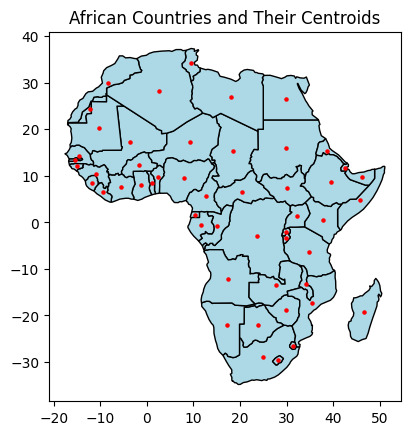

In [19]:
# Plot countries and their centroids
fig, ax = plt.subplots()
africa.plot(ax=ax, color='lightblue', edgecolor='black')
africa.centroid.plot(ax=ax, color='red', markersize=5)
plt.title("African Countries and Their Centroids")
plt.show()

📍 Let’s Work with Coordinates

In [20]:
# What if you want to check whether a given point is inside a country?
from shapely.geometry import Point
# Example point (longitude, latitude)
point = Point(36.8219, -1.2921)  # (lon, lat)

# Check if point is within any country
kenya = africa[africa.contains(point)]
kenya

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
13,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,1,Kenya,...,None,None,None,None,None,None,None,None,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,...",POINT (37.79156 0.59597)


In [21]:
type(kenya)

geopandas.geodataframe.GeoDataFrame

In [22]:
kenya[["NAME"]]

,NAME
13,Kenya


In [23]:
africa[africa.contains(point)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,centroid
13,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,1,Kenya,...,None,None,None,None,None,None,None,None,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,...",POINT (37.79156 0.59597)
